## Ridge Regression Optimization

We generate two highly correlated features X1 and X2 from a multli-variate normal distribution, we would like to implement the Ridge regression.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# Please try to use only these packages for computation

n = 1000
p = 2
#X1 = np.linspace(0,1,n)
#X2 = X1 + np.random.normal
mean = np.zeros((p))
val = 0.99
cov = np.ones((p,p))*val
cov = cov + np.eye(p)*(1-val)

np.random.seed(10)
X = np.random.multivariate_normal(mean, cov, n)
theta_true = np.ones((p,1))




We first generate data based on $y=X\theta+e$, where $e$ follows $N(0,\delta^2)$, with $\delta=0.5$

In [62]:
delta=0.5
e=np.random.normal(0,delta,(n,1))
y=np.dot(X,theta_true)+e

### Part 1: Analytical solution
(1) Let's compute the Least Square analytical solution directly by solving $X^T X \theta = X^T y$

In [63]:
beta_OLS_est =np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
print(beta_OLS_est)


[[ 1.10034069]
 [ 0.89299444]]


(2) Let's compute the Ridge Regression analytical solution directly by solving $(X^T X +\lambda_1 I) \theta = X^T y$

In [64]:
lambda1 = 30
beta_ridge_est = np.dot(np.linalg.inv(np.dot(X.T,X)+np.dot(lambda1,np.identity(2))),np.dot(X.T,y))
print(beta_ridge_est)


[[ 1.0053259 ]
 [ 0.95681108]]


### Part 2: Gradient Descent

(a) Let's use Gradient Descent to solve the solution, first, we would like to define the loss Function. 
We can define the `computeCost(X,y,lambda1,beta)` by
$\|y-X\beta\|^2+\lambda_1 * \|\beta\|^2$
and its gradient in `computeGrad(X, y, lambda1,beta)`

In [65]:
def computeCost(X, y,lambda1, beta):
# Put your code here to estimate the cost function
    y_hat=np.matmul(X,beta)
    diff=y-y_hat
    norm = np.linalg.norm(diff)
    norm_beta = np.linalg.norm(beta)
    norm_sq = norm_beta**2
    cost=norm**2+ lambda1*norm_sq
    return cost

def computeGrad(X, y,lambda1,beta):
# Put your code here to estimate the Gradient function
    y_hat=np.matmul(X,beta)
    diff=y-y_hat
    gradient= -2*np.dot(X.T,diff)+ 2*np.dot(lambda1,beta)
    return gradient
  


(b) Let's use Gradient Descent to update parameter until convergence, please try different stepsize to see the Convergence performance. 

In [66]:
def gradientDescent(X, y, beta, step_size, numIterations):
    beta_values=[]
    loss_values=[]
    for i in range(0, numIterations):
        cost=computeCost(X,y,lambda1,beta)
        loss_values.append(cost)
        if i%50==0:
            print("Iteration %d --- beta:[ %0.5f, %0.5f] --- Cost: %0.5f " % (i, beta.flatten()[0],beta.flatten()[1],cost))
        gradient = computeGrad(X, y,lambda1, beta)
        beta = beta - step_size*gradient
        beta_values.append(beta)
    print("\n final beta: [ %0.5f, %0.5f] \n"%(beta.flatten()[0],beta.flatten()[1]))
    return beta,beta_values,loss_values
numIterations=500
step_size_1=0.0000001
init_beta=np.array([[-1],[-1.5]])
print("Gradient descent with %4d iterations. step_size=%8.7f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,step_size_1,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_1=gradientDescent(X, y, init_beta, step_size_1, numIterations)
step_size_2=0.000001
print("Gradient descent with %4d iterations. step_size=%8.6f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,step_size_2,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_2=gradientDescent(X, y, init_beta, step_size_2, numIterations)
step_size_3=0.00001
print("Gradient descent with %4d iterations. step_size=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,step_size_3,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_3=gradientDescent(X, y, init_beta, step_size_3, numIterations)
step_size_4=0.0001
print("Gradient descent with %4d iterations. step_size=%6.4f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,step_size_4,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_3=gradientDescent(X, y, init_beta, step_size_4, numIterations)


  

Gradient descent with  500 iterations. step_size=0.0000001 and initial beta=[-1.00000,-1.50000]

Iteration 0 --- beta:[ -1.00000, -1.50000] --- Cost: 19409.36672 
Iteration 50 --- beta:[ -0.95770, -1.45751] --- Cost: 18690.64133 
Iteration 100 --- beta:[ -0.91621, -1.41583] --- Cost: 17998.96877 
Iteration 150 --- beta:[ -0.87551, -1.37494] --- Cost: 17333.33077 
Iteration 200 --- beta:[ -0.83558, -1.33483] --- Cost: 16692.74737 
Iteration 250 --- beta:[ -0.79641, -1.29548] --- Cost: 16076.27553 
Iteration 300 --- beta:[ -0.75799, -1.25687] --- Cost: 15483.00767 
Iteration 350 --- beta:[ -0.72030, -1.21899] --- Cost: 14912.07040 
Iteration 400 --- beta:[ -0.68332, -1.18183] --- Cost: 14362.62318 
Iteration 450 --- beta:[ -0.64706, -1.14538] --- Cost: 13833.85714 

 final beta: [ -0.61148, -1.10962] 

Gradient descent with  500 iterations. step_size=0.000001 and initial beta=[-1.00000,-1.50000]

Iteration 0 --- beta:[ -1.00000, -1.50000] --- Cost: 19409.36672 
Iteration 50 --- beta:[ -0

(c) Normally, it is good to visualize the loss function over time, please plot the loss (cost) function for theta in each iteration. 

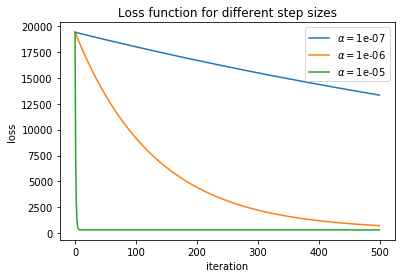

In [67]:
plt.plot(loss_values_1,label=r'$\alpha=$'+str(step_size_1))
plt.plot(loss_values_2,label=r'$\alpha=$'+str(step_size_2))
plt.plot(loss_values_3,label=r'$\alpha=$'+str(step_size_3))
plt.gca().set_ylabel('loss')
plt.gca().set_xlabel('iteration')
plt.gca().set_title('Loss function for different step sizes')
plt.legend()
